In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#input_file = "./data/2024_04_25-30.csv"
input_file = "./data/2024_04_25-05_13.csv"
df = pd.read_csv(
    input_file,
    #nrows=1000000,
    names=["time", "x", "y", "z", "temp"],
    #index_col=0,
    #parse_dates=True,
)

In [3]:
df.tail()

,time,x,y,z,temp
10319901,7 : 1 : 59 : 16.704,76.0,-163.0,-198.0,26.5
10319902,7 : 1 : 59 : 16.768,76.0,-163.0,-198.0,26.5
10319903,7 : 1 : 59 : 16.832,76.0,-163.0,-198.0,26.5
10319904,7 : 1 : 59 : 16.896,76.0,-163.0,-198.0,26.5
10319905,7 : 1 : 59 : 16.960,76.0,-163.0,-198.0,26.5


In [4]:
df.isnull().sum()

time    0
x       2
y       2
z       2
temp    2
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

time    0
x       0
y       0
z       0
temp    0
dtype: int64

In [6]:
df.head()

,time,x,y,z,temp
1,0 : 0 : 0 : 37.64,3.0,-240.0,-160.0,26.5
2,0 : 0 : 0 : 37.128,14.0,-264.0,-44.0,26.5
3,0 : 0 : 0 : 37.192,61.0,-166.0,67.0,26.5
4,0 : 0 : 0 : 37.256,162.0,-311.0,-8.0,26.5
5,0 : 0 : 0 : 37.320,50.0,-142.0,31.0,26.5


In [7]:
# probably super inefficient to use normal python functions like this
df["time"] = pd.to_timedelta(df["time"].str.replace(" ", "").str.replace(":", " days ", 1), unit="days")

In [8]:
df.head()

,time,x,y,z,temp
1,00:00:37.640000,3.0,-240.0,-160.0,26.5
2,00:00:37.128000,14.0,-264.0,-44.0,26.5
3,00:00:37.192000,61.0,-166.0,67.0,26.5
4,00:00:37.256000,162.0,-311.0,-8.0,26.5
5,00:00:37.320000,50.0,-142.0,31.0,26.5


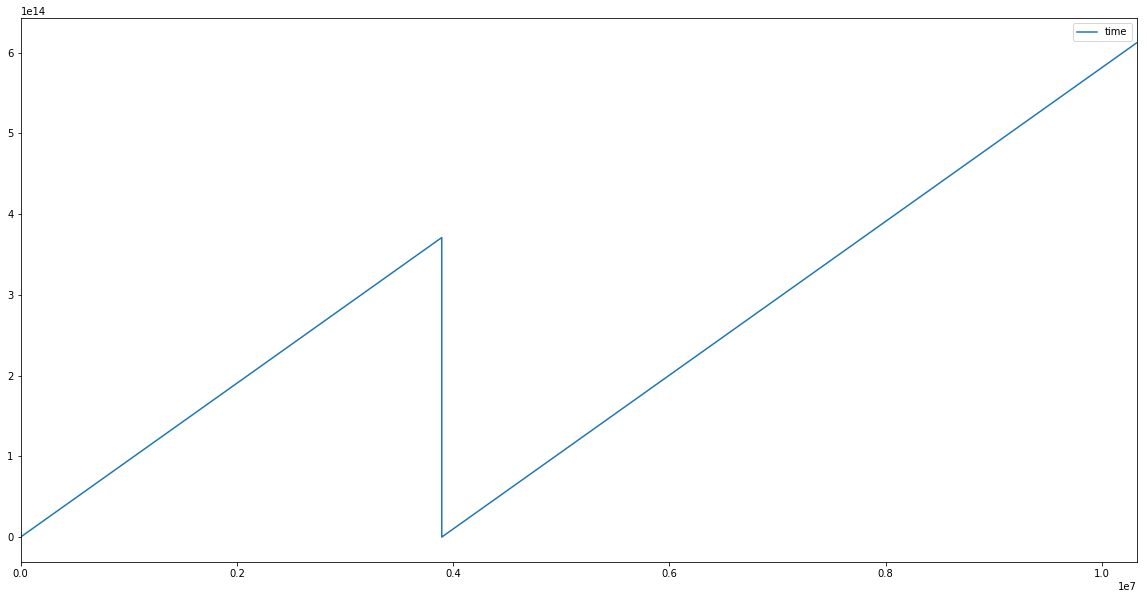

In [9]:
df[["time"]].plot(figsize=(20, 10))

In [10]:
df["hours"] = df["time"].dt.total_seconds()/(60*60)
df["days"] = df["hours"]/24

In [11]:
def inG(x, range=2):
    return range*x/512.

df["x_inG"] = inG(df["x"])
df["y_inG"] = inG(df["y"])
df["z_inG"] = inG(df["z"])
df["magnitude"] = np.sqrt(df["x_inG"]**2 + df["y_inG"]**2 + df["z_inG"]**2)

In [12]:
df["hours"].head()

1    0.010456
2    0.010313
3    0.010331
4    0.010349
5    0.010367
Name: hours, dtype: float64

In [13]:
df["hours"][df["hours"]<0.0107]

1          0.010456
2          0.010313
3          0.010331
4          0.010349
5          0.010367
6          0.010384
7          0.010402
8          0.010420
9          0.010438
10         0.010456
11         0.010473
12         0.010491
13         0.010509
14         0.010527
15         0.010544
16         0.010306
17         0.010556
19         0.010591
20         0.010609
21         0.010627
22         0.010644
23         0.010662
24         0.010680
25         0.010698
3894725    0.010456
3894726    0.010313
3894727    0.010331
3894728    0.010349
3894729    0.010367
3894730    0.010384
3894731    0.010402
3894732    0.010420
3894733    0.010438
3894734    0.010456
3894735    0.010473
3894736    0.010491
3894737    0.010509
3894738    0.010527
3894739    0.010544
3894740    0.010306
3894741    0.010556
3894743    0.010591
3894744    0.010609
3894745    0.010627
3894746    0.010644
3894747    0.010662
3894748    0.010680
3894749    0.010698
Name: hours, dtype: float64

In [14]:
df[df.index>3894721]["time"]

3894722    4 days 07:02:40.896000
3894723    4 days 07:02:40.960000
3894725    0 days 00:00:37.640000
3894726    0 days 00:00:37.128000
3894727    0 days 00:00:37.192000
3894728    0 days 00:00:37.256000
3894729    0 days 00:00:37.320000
3894730    0 days 00:00:37.384000
3894731    0 days 00:00:37.448000
3894732    0 days 00:00:37.512000
3894733    0 days 00:00:37.576000
3894734    0 days 00:00:37.640000
3894735    0 days 00:00:37.704000
3894736    0 days 00:00:37.768000
3894737    0 days 00:00:37.832000
3894738    0 days 00:00:37.896000
3894739    0 days 00:00:37.960000
3894740    0 days 00:00:37.102400
3894741           0 days 00:00:38
3894742    0 days 00:00:38.640000
3894743    0 days 00:00:38.128000
3894744    0 days 00:00:38.192000
3894745    0 days 00:00:38.256000
3894746    0 days 00:00:38.320000
3894747    0 days 00:00:38.384000
3894748    0 days 00:00:38.448000
3894749    0 days 00:00:38.512000
3894750    0 days 00:00:38.576000
3894751    0 days 00:00:38.640000
3894752    0 d

In [15]:
mask = df.index>3894723
offset = df["time"][3894723]
df["time"][mask] = df["time"][mask] + offset

/home/bryan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df[df.index>3894721]["time"]

3894722     4 days 07:02:40.896000
3894723     4 days 07:02:40.960000
3894725     4 days 07:03:18.600000
3894726     4 days 07:03:18.088000
3894727     4 days 07:03:18.152000
3894728     4 days 07:03:18.216000
3894729     4 days 07:03:18.280000
3894730     4 days 07:03:18.344000
3894731     4 days 07:03:18.408000
3894732     4 days 07:03:18.472000
3894733     4 days 07:03:18.536000
3894734     4 days 07:03:18.600000
3894735     4 days 07:03:18.664000
3894736     4 days 07:03:18.728000
3894737     4 days 07:03:18.792000
3894738     4 days 07:03:18.856000
3894739     4 days 07:03:18.920000
3894740     4 days 07:03:18.062400
3894741     4 days 07:03:18.960000
3894742     4 days 07:03:19.600000
3894743     4 days 07:03:19.088000
3894744     4 days 07:03:19.152000
3894745     4 days 07:03:19.216000
3894746     4 days 07:03:19.280000
3894747     4 days 07:03:19.344000
3894748     4 days 07:03:19.408000
3894749     4 days 07:03:19.472000
3894750     4 days 07:03:19.536000
3894751     4 days 0

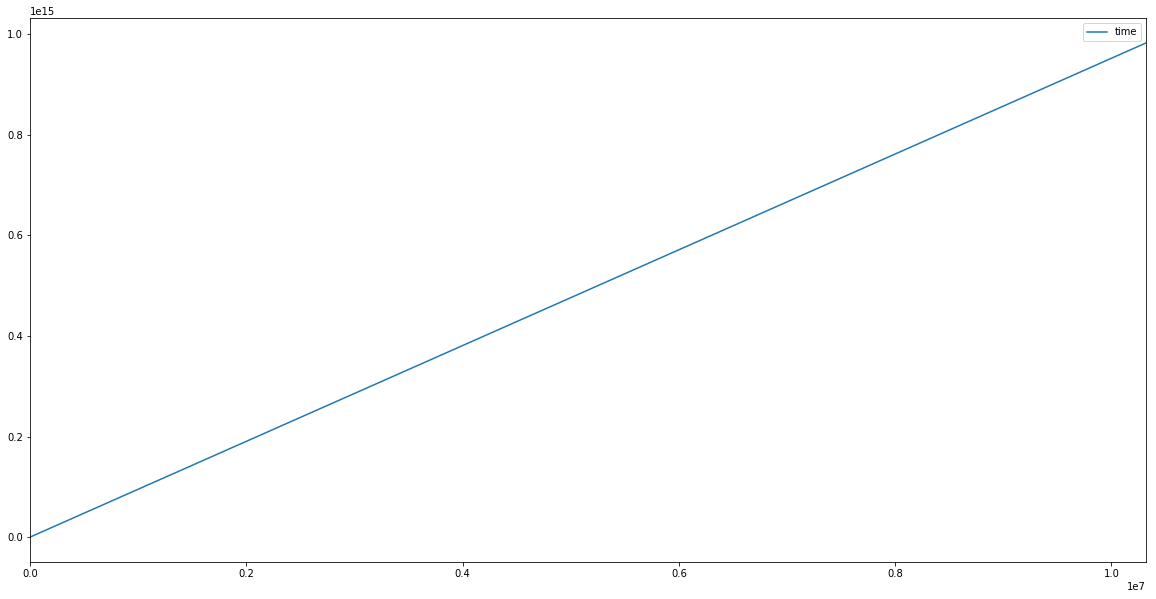

In [17]:
df[["time"]].plot(figsize=(20, 10))

In [18]:
df["hours"] = df["time"].dt.total_seconds()/(60*60)
df["days"] = df["hours"]/24
df.set_index("time")

,x,y,z,temp,hours,days,x_inG,y_inG,z_inG,magnitude
time,,,,,,,,,,
0 days 00:00:37.640000,3.0,-240.0,-160.0,26.5,0.010456,0.000436,0.011719,-0.937500,-0.625000,1.126796
0 days 00:00:37.128000,14.0,-264.0,-44.0,26.5,0.010313,0.000430,0.054688,-1.031250,-0.171875,1.046904
0 days 00:00:37.192000,61.0,-166.0,67.0,26.5,0.010331,0.000430,0.238281,-0.648438,0.261719,0.738746
0 days 00:00:37.256000,162.0,-311.0,-8.0,26.5,0.010349,0.000431,0.632812,-1.214844,-0.031250,1.370136
0 days 00:00:37.320000,50.0,-142.0,31.0,26.5,0.010367,0.000432,0.195312,-0.554688,0.121094,0.600407
0 days 00:00:37.384000,140.0,-278.0,-115.0,26.5,0.010384,0.000433,0.546875,-1.085938,-0.449219,1.296198
0 days 00:00:37.448000,36.0,-223.0,-2.0,26.5,0.010402,0.000433,0.140625,-0.871094,-0.007812,0.882406
0 days 00:00:37.512000,85.0,-226.0,-55.0,26.5,0.010420,0.000434,0.332031,-0.882812,-0.214844,0.967347
0 days 00:00:37.576000,128.0,-199.0,-55.0,26.5,0.010438,0.000435,0.500000,-0.777344,-0.214844,0.948905


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,10319904,5 days 16:31:21.767143,3 days 06:48:58.020541,0 days 00:00:37.102400,2 days 20:15:48.490000,5 days 16:31:34.940000,8 days 12:46:46.430000,11 days 09:01:57.920000
x,1.03199e+07,9.21638,56.7809,-440,-2,4,10,511
y,1.03199e+07,-34.9733,74.9527,-507,-55,-26,-19,511
z,1.03199e+07,0.821306,237.385,-504,-258,-93,250,511
temp,1.03199e+07,25.8917,1.21746,21.5,25,26,27,30.5
hours,1.03199e+07,136.523,78.8161,0.0103062,68.2635,136.526,204.78,273.033
days,1.03199e+07,5.68845,3.284,0.000429426,2.84431,5.6886,8.53248,11.3764
x_inG,1.03199e+07,0.0360015,0.2218,-1.71875,-0.0078125,0.015625,0.0390625,1.99609
y_inG,1.03199e+07,-0.136615,0.292784,-1.98047,-0.214844,-0.101562,-0.0742188,1.99609
z_inG,1.03199e+07,0.00320823,0.927286,-1.96875,-1.00781,-0.363281,0.976562,1.99609


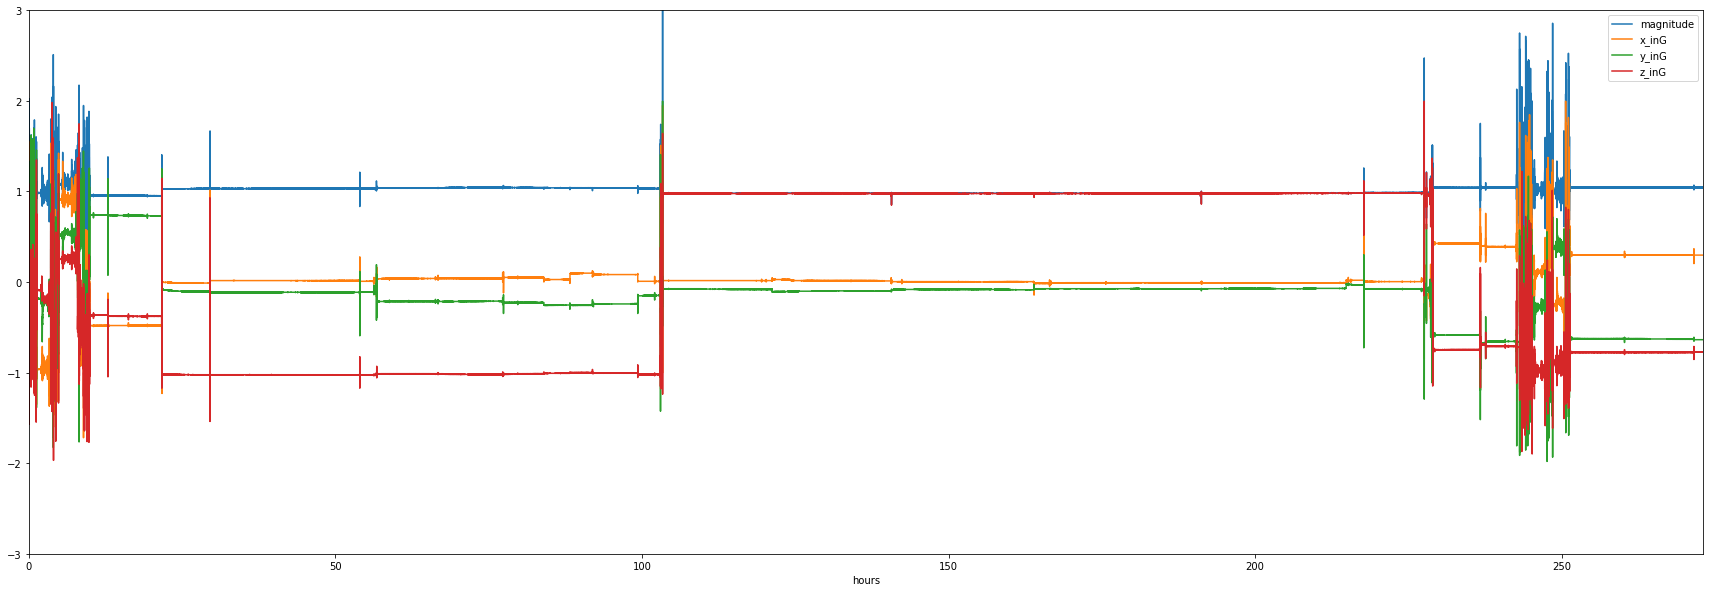

In [20]:
ax = df[["magnitude", "x_inG", "y_inG", "z_inG", "hours"]].plot(x="hours", figsize=(30, 10))
plt.ylim(-3, 3)
plt.show()

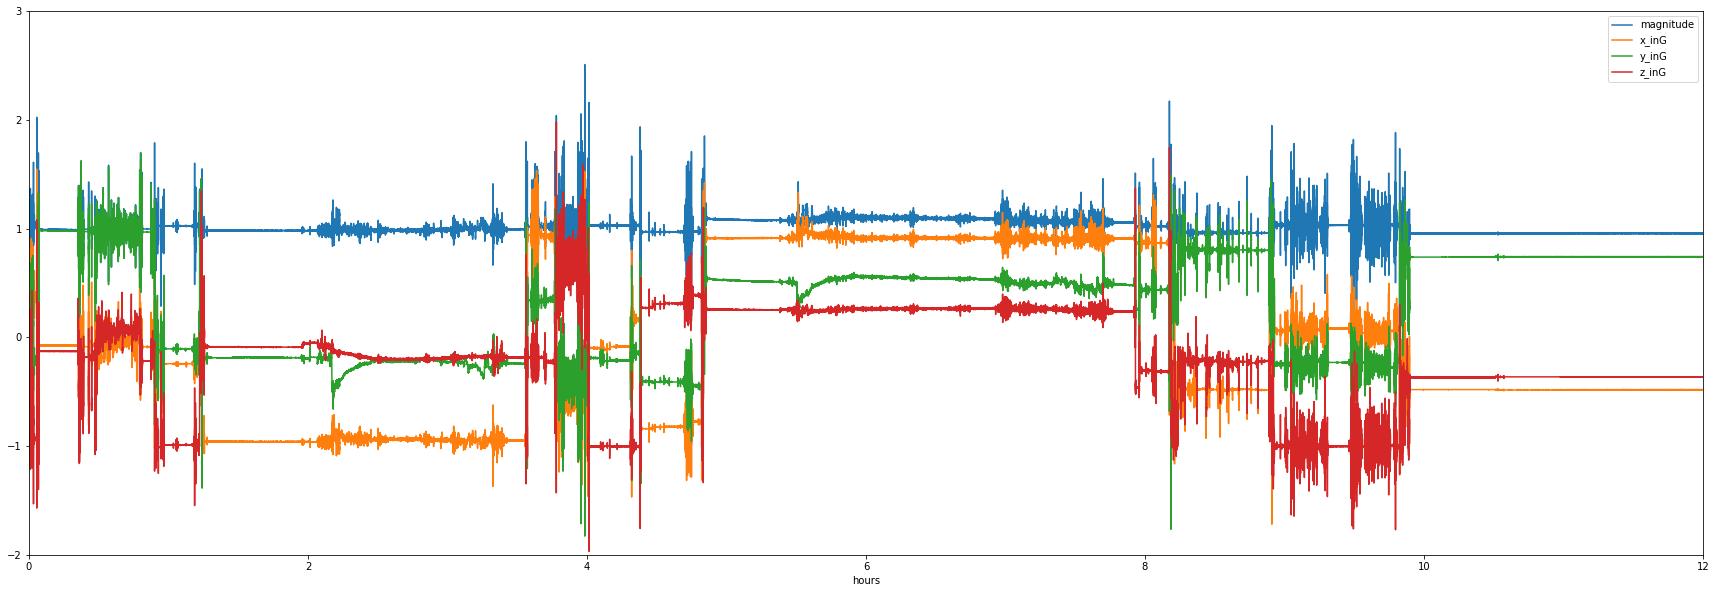

In [21]:
ax.set_xlim(0, 12)
ax.set_ylim(-2, 3)
ax.get_figure()

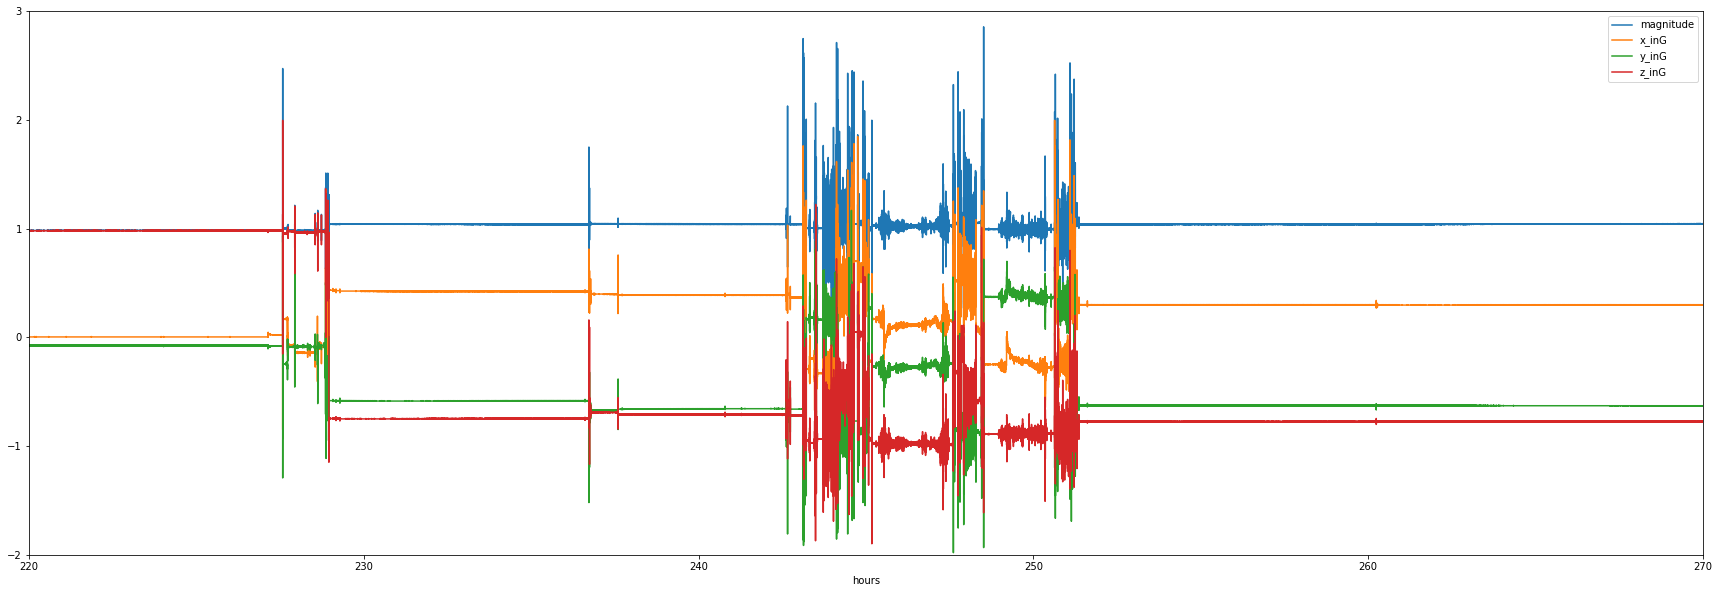

In [22]:
ax.set_xlim(220, 270)
ax.get_figure()